# 简介
1. Sklearn
2. 吴恩达视频

# 主要内容

## Sklearn

### 6 model常用属性和功能
sklearn的每一个model都有自己的一些属性和功能。

In [40]:
%config InlineBackend.figure_format = 'svg' #使图片成为矢量图
import numpy as np
import pandas as pd

In [21]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

loaded_data = datasets.load_boston()
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression() #参数可以改变，但默认值就非常好
model.fit(data_X,data_y)
print(model.predict(data_X[:4,:]))

[30.00821269 25.0298606  30.5702317  28.60814055]


以上例子中`model.fit()`是model的一个功能，同时model还有自己的属性。

In [22]:
#y = 0.1x + 0.3
print(model.coef_) #Weights
print(model.intercept_) #bias

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
36.49110328036103


上述例子表明了我们还可以输出model训练后的**权重**和**偏差值**

权重：`model.coef_`

偏差值：`model.intercept_`

In [23]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


通过`.get_params()`可以获取我们之前在model里定义的参数。如果未定义，则返回默认的参数值。

In [24]:
print(model.score(data_X,data_y))

0.7406077428649428


`.score(X,y)`输出对X的预测结果与y标签的匹配率，多少预测是正确的，多少事错误的。

这个函数使用的打分方法是$R^2\ coefficient\ of\ determination$

*PS:*

*$R^2\ coefficient\ of\ determination$是在线性回归模型里衡量预测模型输出结果的一种方法。（挖个坑，以后再了解了解）*

### 7 标准化
标准化是机器学习数据预处理里很重要的一步。

常见有两种标准化方法：
1. $$x=\frac{x-min}{max}$$
2. $$x=\frac{x-\mu}{\sigma}$$

吴恩达视频里也讲过，这里不再赘述。

下面是如何用sklearn实现标准化的例子。

In [25]:
from sklearn import preprocessing #导入数据预处理的包

a = np.array([[10,2.7,3.6],
             [-100,5,-2],
             [120,20,40]],dtype=np.float64)

print(a)
print(preprocessing.scale(a)) #实现的是第二种标准化

[[  10.     2.7    3.6]
 [-100.     5.    -2. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.55138018]
 [-1.22474487 -0.55187146 -0.852133  ]
 [ 1.22474487  1.40357859  1.40351318]]


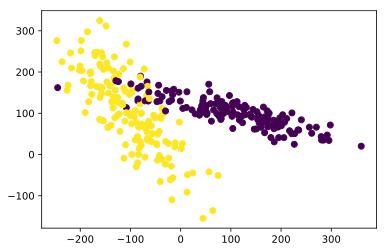

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

#我们生成一些用于分类的随机数据
#300个数据，2个属性，(n_informative)2个相关属性
#设定了random_state后产生的随机数就固定了
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()



以上是我们得到的数据，注意这些数据的取值范围。

In [27]:
X = preprocessing.scale(X)
#还要另外一种压缩方法：
#X=preprocessing.minmax_scale(X,feature_range(-1,1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
clf = SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9111111111111111


以上模型的精确度大约是94%

接下来我们以不进行标准化的数据进行训练以做对比。

In [28]:
X,y = make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,random_state=22,n_clusters_per_class=1,scale=100)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)
clf = SVC()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


0.4777777777777778


可见，数据的标准化对训练结果的影响非常大。

### 8 cross validation 交叉验证1


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.9736842105263158


当数据集较小时，可以使用交叉验证，取数据集不同的部分做Test集来评价模型的预测结果。

下面我们用`cross_val_score`来实现交叉验证。

In [30]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
#cv表示交叉验证的次数。
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


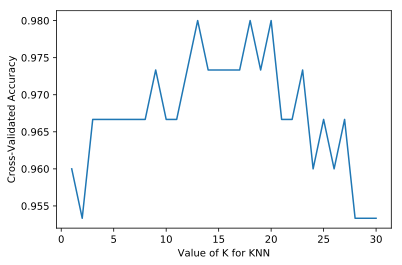

In [31]:
import matplotlib.pyplot as plt
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    #loss = -cross_val_score(knn,X,y,cv=10,scoring='neg_mean_squared_error')
    #上述这一行针对于回归问题
    k_scores.append(scores.mean())

plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.xticks(k_range)
plt.show()

上面我们通过循环和可视化来改变超参数`n_neigbors`的值来寻找最优的k值。

这样的方法可以用于绝大部分超参数的选择。

### 9 cross validation 交叉验证2

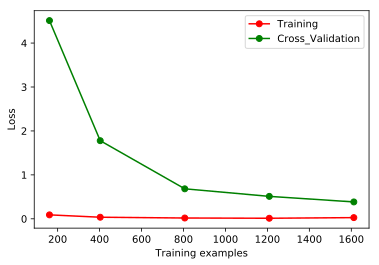

In [32]:
from sklearn.model_selection import learning_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#learning_curve输出训练集大小train_sizes，
#train_loss输出训练损失函数随时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_sizes,train_loss,test_loss = learning_curve(
    SVC(gamma=0.001),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])


train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',c='r',label='Training')
plt.plot(train_sizes,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

由上图可见，交叉验证的loss值随训练数据的增加而减少

In [33]:
print(train_loss.shape)
print(test_loss.shape)

(5, 10)
(5, 10)


如果我们改变`SVC()`的`gamma`值：

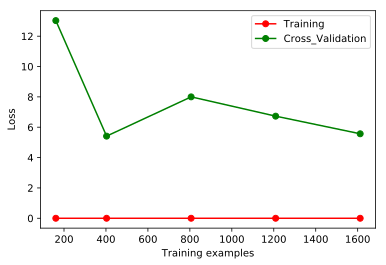

In [34]:
from sklearn.model_selection import learning_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#learning_curve输出训练集大小train_sizes，
#train_loss输出训练损失函数虽时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_sizes,train_loss,test_loss = learning_curve(
    SVC(gamma=0.01),X,y,cv=10,scoring='neg_mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])


train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(train_sizes,train_loss_mean,'o-',c='r',label='Training')
plt.plot(train_sizes,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

由上图可以分析出，模型产生了过拟合，因为在训练数据上的loss值很小，然而在交叉验证集上的loss趋于稳定到一个较大的值。

### 10 cross validation 交叉验证3
这次的cross validation与之前的有所不同。之前的cross validation用于评估单个的表现。

而这次我们将把training和cross validation两条曲线全部plot上去进行分析。

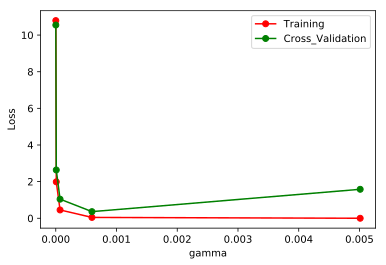

In [35]:
from sklearn.model_selection import validation_curve #学习曲线包
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

#用于设置SVC的参数。
param_range = np.logspace(-6,-2.3,5)

#train_loss输出训练损失函数虽时间的波动变化
#train_sizes[]表示在哪些点记录输出数据（在曲线上画出点）
train_loss,test_loss = validation_curve(
    SVC(),X,y,param_name='gamma',param_range=param_range,cv=10,
    scoring='neg_mean_squared_error')

train_loss_mean = -np.mean(train_loss,axis=1)
test_loss_mean = -np.mean(test_loss,axis=1)

plt.plot(param_range,train_loss_mean,'o-',c='r',label='Training')
plt.plot(param_range,test_loss_mean,'o-',c='g',label='Cross_Validation')


plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

以上图表示train和cross validation的loss值随gamma的变化。

可见大致当`gamma=0.0006`的时候，模型表现最好，之后的曲线展现了模型过拟合的过程。

### 11 Save Model
保存model的方式有两种。
1. python自带的pickle
2. sklearn的joblib

In [36]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data, iris.target
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 方法一：pickle

In [37]:
import pickle

#保存模型
with open('clf.pickle','wb') as f: #with语句自动关闭
    pickle.dump(clf,f)
    
#载入模型
with open('clf.pickle','rb') as f:
    clf2 = pickle.load(f)
    print(clf2.predict(X[0:1]))

[0]


#### 方法二：joblib

In [38]:
from sklearn.externals import joblib
joblib.dump(clf,'clf.pkl') #保存模型

clf3 = joblib.load('clf.pkl') #载入模型
print(clf3.predict(X[0:1]))

[0]


## Andrew Ng视频

### 3.1 目标定位
在了解目标检测前，我们需要先了解目标定位。

以包含汽车的图像为例。
图像分类的算法是通过遍历图片，判断图片中的对象是是否是汽车。而本节将学习的是另一个问题——定位分类问题。
这意味着我们不仅要用算法判断图片中是不是一辆汽车，还要在图片中标记出它的位置，用边框或红色方框把汽车圈起来。
之后将要了解的目标检测则是在存在多个对象的图片中应该如何检测它们并确定它们的位置。

定位分类问题中，我们使用的图片里通常只有一个较大的对象位于图片中间位置，我们要对它进行识别和定位。

图片分类的思路可以帮助学习分类定位，而对象定位的思路又有助于学习对象检测。

我们先从分类和定位开始。

以开发自动驾驶系统为例。
我们先设置4个标签：
1. 行人
2. 汽车
3. 摩托车
4. 背景

分类问题就回到之前的内容。

为了实现定位，我们需要让神经网络多输出几个单元组成边界框
![1.png](screenshots/1.png)
这里约定：图片左上角坐标为$(0,0)$，右下角坐标为$(1,1)$，要想确定边界框的具体位置，需要指定红色方框的中心点，设为$(b_x,b_y)$，边界框的高度设为$b_h$，宽度设为$b_w$。因此训练集不仅要包含标签，还包含边界框的这4个数字，最后输出的不仅是一个分类标签，还要有那4个参数值。



那么我们该如何定义标签$y$来制作数据集呢？

这里我们定义**目标标签**$y$是这的一个向量：$$y=\begin{bmatrix} P_c \\ b_x \\ b_y \\ b_h \\ b_w  \\ c_1 \\ c_2 \\ c_3\end{bmatrix}$$
其中
1. $P_c$表示是否含有对象，如果对象不为背景，则$P_c=1$，否则为$0$
2. 当$P_c=1$时，$c_i$表示对象的类别。

以上面“雪中汽车”图为例，$$y=\begin{bmatrix} 1 \\ b_x \\ b_y \\ b_h \\ b_w \\ 0 \\ 1 \\ 0 \end{bmatrix}$$
$c_1,c_2,c_3$最多只有一个等于1，因为图片中只有一个对象。

如果图片中没有对象，则$P_c=0$，那么$y$向量的其他元素就没有意义。

以上这些数据构成了我们的训练集。

目标函数也需要做出改动，以上面的$y$标签为例，并采用平方误差策略。
$$
\begin{equation}
L(\hat{y},y)=
\left\{
\begin{array}{loss func}
\sum_i^8(\hat{y_i}-y_i)^2 & & if\ y_1=1 \\
(\hat{y_1}-y_1)^2 & & if\ y_1=0
\end{array}
\right.
\end{equation}
$$
通常在实际应用中，我们对$P_c$应用逻辑回归函数或平方误差，对边界框坐标应用平方误差或类似方法，对$c_i$和$softmax$函数可以应用对数损失函数并输出其中一个元素的值。

ps:
逻辑（对数）损失函数$$J(w,b)=-\frac{1}{m}\sum_{i=1}^{m}\left[y^{(i)}\log \hat{y}^{(i)}+(1-y^{(i)})\log (1-\hat{y}^{(i)})\right]$$

### 3.2 特征点检测
上一节我们通过输出有关边框值的4个坐标来定位对象，这表明神经网络可以通过输出坐标值$(x,y)$来实现对目标特征的识别。

这里我们以构建一个人脸识别的应用为例。

我们希望算法可以给出人眼角的具体位置$(x,y)$，这样神经网络的最后一层就需要多输出两个数字$l_x$和$l_y$作为眼角的坐标。

如果我们希望输出更多的特征点坐标$l_{ix}$,$l_{iy}$，如更多嘴的特征点坐标来判断人物是否在微笑。那么我们在训练集中需要加入特征点的坐标值，然后用神经网络输出脸部关键特征点的位置。

假设我们设定了64个特征点，那么我们最后输出应该是这样一个结果$$y=\begin{bmatrix}y_1\\ l_{1x}\\ l_{1y} \\ \vdots \\ l_{64x} \\ l_{64y} \end{bmatrix}$$
其中$y_1$表示是否有人脸。

这个输出一共有129个元素。通过这样的方式实现对图片的人脸检测和定位。这便构成了一个识别脸部标签的基本构造模块。

对于构造人物姿态检测的模型同理可得。

### 3.3 目标检测
本节学习的是如果通过卷积网络进行对象检测，采用基于滑动窗口的目标检测算法。

以构建一个汽车检测算法为例。

步骤是
1. 创建一个标签训练集，如下图所示![image.png](screenshots/2.png)
利用这些图片构建卷积神经网络模型，然后再输入适当剪切过的图像，查看网络输出的y值。卷积网络训练完后便可用于实现滑动窗口目标检测。
2. 首先选定一个特定大小的窗口。![image.png](screenshots/3.png)
接着将窗口输入网络，卷积网络开始判断窗口（红色方框）内有没有汽车，然后窗口会滑动（步长恒定），继续处理第二个图像。依次重复操作，直至整张图片都被检测完。
3. 之后我们改变窗口大小，重复第2步

这个算法很明显的缺点是计算成本过大。之前人们使用简单线性分类器而不是卷积网络，计算量可以接受，但卷积网络运行单个分类任务的成本却高得多。

而且，除非使用小粒度或极小步长，否则无法准确定位图片中的对象。

幸运的是，计算成本问题已有很好的解决方案，见下节。

### 3.4 卷积的滑动窗口实现
本节介绍如何在卷积层上应用滑动窗口的算法。

首先要把神经网络的全连接层转化为卷积层。
![image.png](./screenshots/4.png)
如上图所示，在原本应当构建全连接层时，用相同大小的400个卷积层卷积这样输出维度就是$1\times1\times400$，此时它不是一个含400个节点的全连接层，而是一个输出层。

然后再用$1\times1$卷积，最后再用$1\times1$过滤器处理，得到$softmax$激活值。

接下来我们看看如何通过卷积实现滑动窗口对象检测算法。
![image.png](screenshots/5.png)
以训练集使用$14\times14\times3$的图片为例，当测试集图片大小为$16\times16\times3$时，模型先检测左上角的$14\times14$的区域得到输出，假设步长为2，则下一步检测右上角$14\times14$的区域再得到输出，然后是左下角、右下角。

不难发现这4次运算中，很多次都是重复的。为了解决这个问题，我们可以进行如下操作。
![image.png](screenshots/6.png)
这样，最后那个$2\times2\times4$的左上角方块即是原图像左上角那个$14\times14$的区域的输出，其他3个方块同理。